In [4]:
#Movie rating analysis
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the dataset
df_csv=pd.read_csv("F:/OneDrive/Documents/BICS_INTERNSHIP/PROJECT/Movie_Rating_Analysis/movie_ratings.csv")

In [14]:
df_csv["budget"] = df_csv["budget"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df_csv["box_office"] = df_csv["box_office"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df_csv["run_time"] = df_csv["run_time"].astype(str).str.replace(r"[^0-9.]", "", regex=True)

# Convert to numeric (errors='coerce' converts invalid to NaN)
df_csv["budget"] = pd.to_numeric(df_csv["budget"], errors="coerce")
df_csv["box_office"] = pd.to_numeric(df_csv["box_office"], errors="coerce")
df_csv["run_time"] = pd.to_numeric(df_csv["run_time"], errors="coerce")
df_csv["year"] = pd.to_numeric(df_csv["year"], errors="coerce")
df_csv["rating"] = pd.to_numeric(df_csv["rating"], errors="coerce")
df_csv['budget'] = df_csv['budget'].replace('[\$,]', '', regex=True).astype(float)
df_csv['box_office'] = df_csv['box_office'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
#first five rows
df_csv.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [11]:
#Total rows and columns
print("Rows and Columns:",df_csv.shape)

Rows and Columns: (250, 13)


In [13]:
#Basic statistics summary
df_csv.describe().round()

,rank,year,rating
count,250.0,250.0,250.0
mean,126.0,1986.0,8.0
std,72.0,25.0,0.0
min,1.0,1921.0,8.0
25%,63.0,1966.0,8.0
50%,126.0,1994.0,8.0
75%,188.0,2006.0,8.0
max,250.0,2022.0,9.0


In [13]:
#Information
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [16]:
#Data cleaning
df_csv.isnull().sum()
df_csv.drop_duplicates()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley


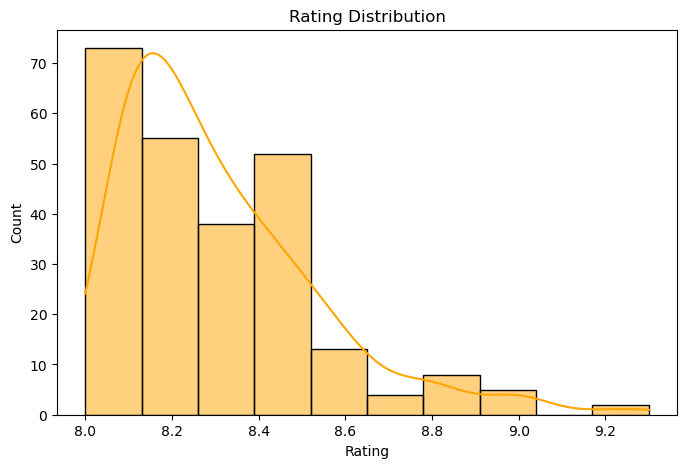

In [8]:
#Univariate Analysis- i)Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_csv['rating'], bins=10, kde=True,color="orange")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("Rating_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-Most ratings fall within the middle range, indicating an overall balanced rating pattern.
-Very high or very low ratings are less frequent.

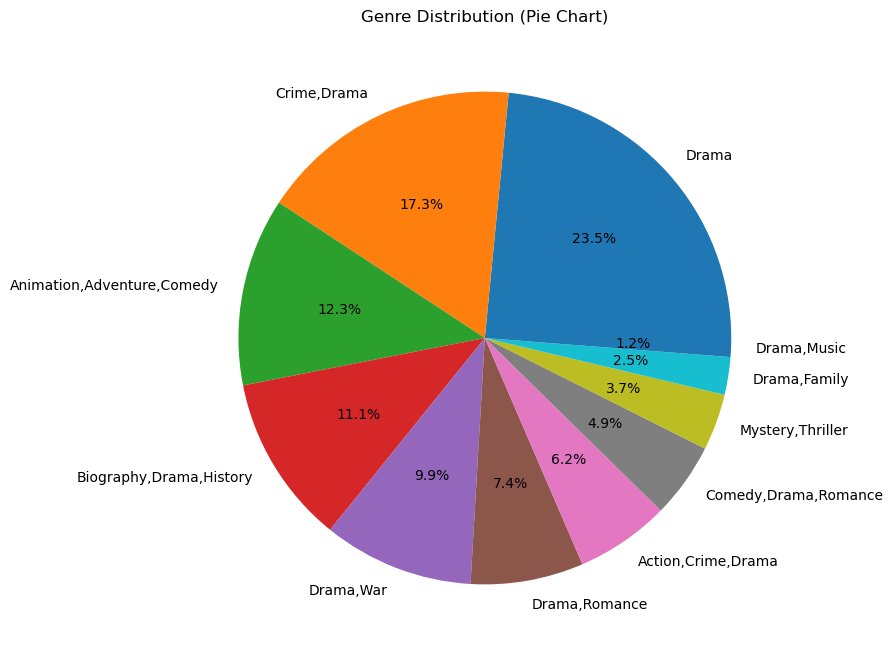

In [9]:
#ii)Genre Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
df_csv['genre'].value_counts().drop_duplicates().plot.pie(autopct='%1.1f%%')
plt.title("Genre Distribution (Pie Chart)")
plt.ylabel("")
plt.savefig("Genre_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-Shows proportion of each genre.
-Most movies belong to a few major genres.

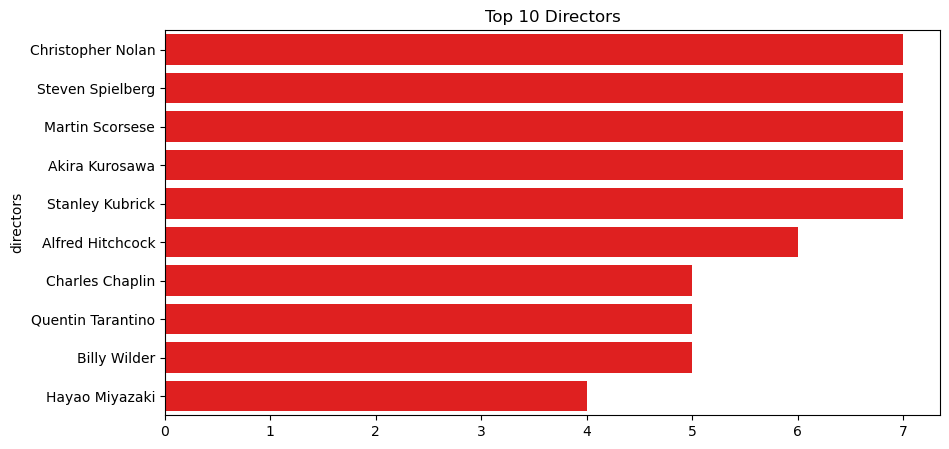

In [10]:
#iii)Top 10 directors
plt.figure(figsize=(10,5))
top_directors = df_csv['directors'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index,color="red")
plt.title("Top 10 Directors")
plt.savefig("Top_Directors.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-A few directors contribute to multiple films.
-Dataset contains many one-film directors.

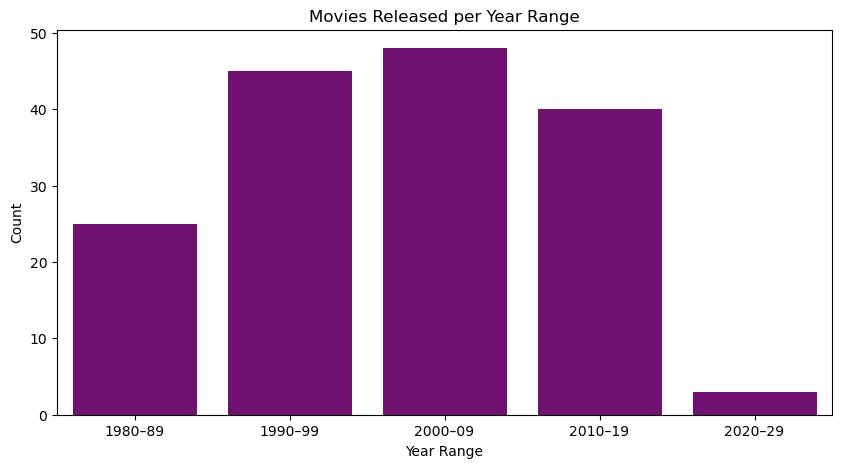

In [11]:
#iv)Year Wise Movie Distribution
bins = [1980, 1990, 2000, 2010, 2020, 2030]
labels = ["1980–89", "1990–99", "2000–09", "2010–19", "2020–29"]
df_csv['year_range'] = pd.cut(df_csv['year'], bins=bins, labels=labels)
plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=df_csv['year_range'].value_counts()[labels],color="purple")
plt.title("Movies Released per Year Range")
plt.xlabel("Year Range")
plt.ylabel("Count")
plt.savefig("Movies_Released.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-Displays number of movies released each year.
-Certain years show higher production levels.

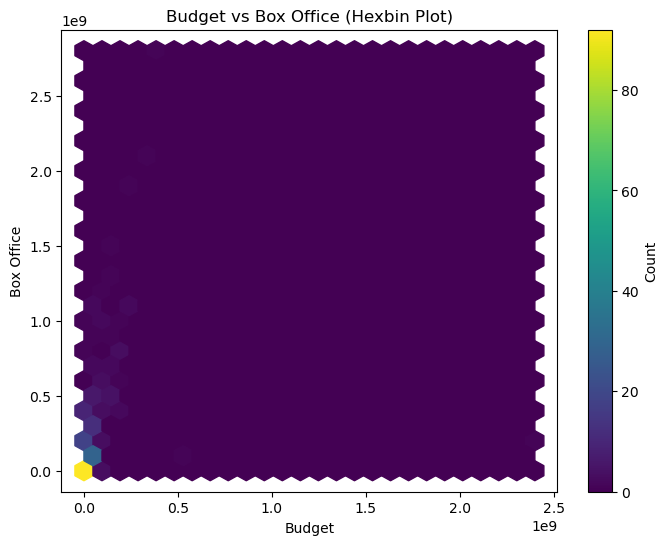

In [16]:
#Bivariate Analysis-i)Budget vs Boxoffice
plt.figure(figsize=(8,6))
plt.hexbin(df_csv['budget'], df_csv['box_office'], gridsize=25)
plt.xlabel("Budget")
plt.ylabel("Box Office")
plt.title("Budget vs Box Office (Hexbin Plot)")
plt.colorbar(label='Count')
plt.savefig("Budget_Boxoffice.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-This plot reveals a clear positive relationship between movie budgets and box-office earnings. 
-Higher-density clusters appear in the mid-to-high budget range, indicating that films with larger investments tend to generate stronger revenue

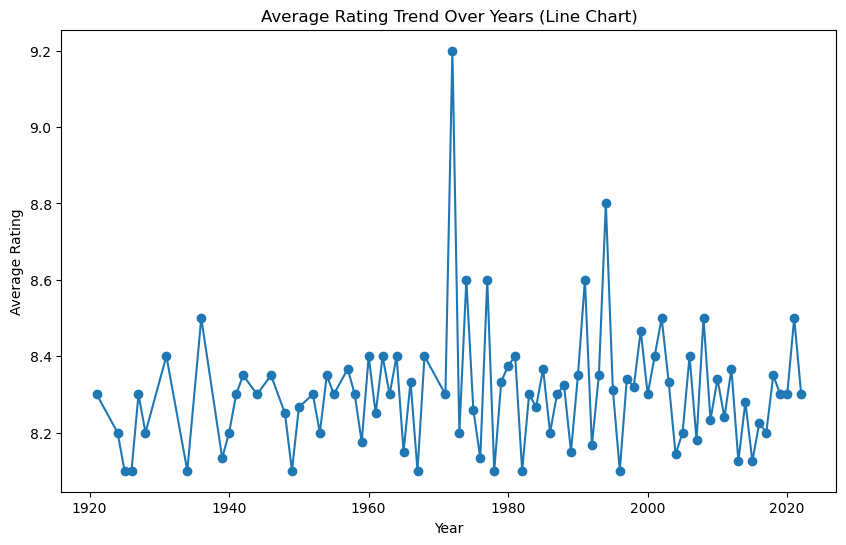

In [17]:
#ii)Rating over Years
year_rating = df_csv.groupby('year')['rating'].mean()
plt.figure(figsize=(10,6))
plt.plot(year_rating.index, year_rating.values, marker='o')
plt.title("Average Rating Trend Over Years (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.savefig("Average_Rating.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-The line graph shows that average ratings remain fairly consistent year by year.
-But a significant upward is observed during 1960-80, suggesting audience ratings were higher during that period of time.

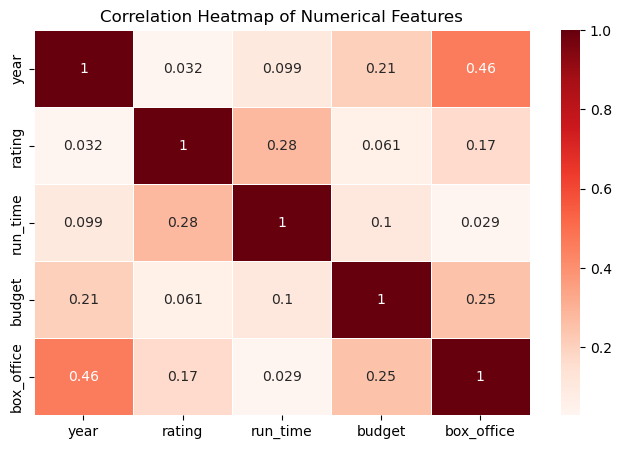

In [18]:
#Multivariate Analysis-Correlation Heatmap
num_cols = ["year", "rating", "run_time", "budget", "box_office"]
corr = df_csv[num_cols].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="Reds", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Insights:
-Budget , box office show the strongest positive relationship, suggesting higher investment often leads to higher earnings.
-Other numerical features have weak correlations, indicating they don’t strongly influence each other.

In [ ]:
##Key Insights Summary
•	Ratings are moderately distributed, with most films falling in the mid-range.
•	A few genres dominate production, indicating audience-driven trends.
•	Movie releases have increased significantly over years, reflecting industry expansion.
•	Top directors play a major role in shaping the dataset, showing their influence on production volume.
•	Higher budgets drive higher box-office earnings, confirming investment as a key success factor.
•	Average ratings remain stable across years, showing consistent audience expectations.
•	Only budget and box office share a strong correlation; other relationships are weak.

In [ ]:
##Conclusion
The movie industry demonstrates steady growth over time with consistent audience reception.
Budget emerges as the strongest predictor of financial success, while other factors show limited influence. 
Genre choices and experienced directors significantly shape production patterns. 
Overall, the dataset reveals predictable trends in both creative and financial aspects of movie performance.


In [ ]:
##Recommendations
•	Invest more in genres with historically strong audience interest.
•	Allocate higher budgets to projects that aim for strong box-office performance.
•	Collaborate with experienced directors who consistently deliver high-performing films.
•	Track yearly trends to better plan content strategy for future productions.


In [60]:
df_csv.to_csv("cleaned_movie_dataset.csv", index=False)